# Does Video Games Ratings Impact Sales?

### Data Exploration:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pylab 
from scipy import stats
%matplotlib inline

#Introducing the data
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
#Remove null and incomplete data rows for year 2017, 2020 and other null values
df = df[df.Year_of_Release != 2017]
df = df[df.Year_of_Release != 2020]
df = df[df.Year_of_Release.notnull()]

df.Year_of_Release.unique()

array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2016.,  2003.,  1986.,  2000.,  1995.,
        1991.,  1981.,  1987.,  1980.,  1983.])

In [5]:
#Remove null genre data rows, unable to find genre due to missing game name (removed a total of 2 NaN genre row)
df = df[df.Genre.notnull()]
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [6]:
#Check info once more
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16718
Data columns (total 16 columns):
Name               16444 non-null object
Platform           16444 non-null object
Year_of_Release    16444 non-null float64
Genre              16444 non-null object
Publisher          16412 non-null object
NA_Sales           16444 non-null float64
EU_Sales           16444 non-null float64
JP_Sales           16444 non-null float64
Other_Sales        16444 non-null float64
Global_Sales       16444 non-null float64
Critic_Score       7983 non-null float64
Critic_Count       7983 non-null float64
User_Score         9839 non-null object
User_Count         7463 non-null float64
Developer          9906 non-null object
Rating             9768 non-null object
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


# Background

**Background:** "Since the late 1990s, some acts of violence have been highly publicized in relation to beliefs the suspect in the crime may have had a history of playing violent video games. Some research proposes violent video game use correlates with a temporary increase in aggression and a decrease in prosocial behavior (caring about the welfare and rights of others), but these results have not been reproduced.[5][6][7] Others theorise positive effects of playing video games including prosocial behavior in some contexts[8][9] and argue that the video game industry has served as a scapegoat for more generalised problems affecting some communities." ~ Wikipedia (https://en.wikipedia.org/wiki/Video_game_controversies)

**Hypotheses for negative effect of video games:** "Theories of negative effects of video games tend to focus on the potential for players to model behaviors witnessed in the game which may be exacerbated due to the interactive nature of these games. The most well known theory of such effects is the General Aggression Model (GAM) which proposes that playing violent video games may create cognitive scripts of aggression which will be activated in incidents in which individuals think others are acting with hostility.[13] Playing violent video games, thus, becomes an opportunity to rehearse acts of aggression, which then become more common in real life. The general aggression model suggests the simulated violence of video games may influence a player's thoughts, feelings and physical arousal and this in turn creates a short-term (and possibly a long-term) effect on an individual's interpretation of an aggressive or violent act.[14] The GAM has been controversial, however, with some scholars criticizing it on the basis of a number of problematic assumptions, such as that aggression is primarily learned, that the brain does not distinguish reality from fiction, etc.[15] Some recent studies have explicitly claimed to find evidence against the GAM.[16][17][18]

Some biological theories of aggression have specifically excluded video game and other media effects because the evidence for such effects is considered weak and the impact too distant. For example, the catalyst model of aggression comes from a diathesis-stress perspective, implying that aggression is due to a combination of genetic risk and environmental strain. The catalyst model suggests that stress, coupled with antisocial personality are salient factors leading to aggression. It does allow that proximal influences such as family or peers may alter aggressiveness but not media and games.[19][20]" ~ Wikipedia (https://en.wikipedia.org/wiki/Video_game_controversies)

## The Problem: <br><br>_"Due to the General Aggression Model (GAM), a theory in the hypotheses of negative effect from video games, caused fear among regulators that 'acts of aggression [are becoming] more common in real life'."_<br>

***

# The Potential Solution: 
## _"Adding a rating system to games will decrease video game sales for the 3 locations by creating barriers of entry, making it more difficult for the consumers that are not old enough to purchase video games that is not recommended for them."_

### Rating Agencies:

**Regulations in USA:** "The Entertainment Software Rating Board (ESRB) is a self-regulatory organization that assigns age and content ratings, enforces industry-adopted advertising guidelines, and ensures responsible online privacy principles for computer and video games in the United States, Canada, and Mexico. The ESRB was established in 1994 by the Entertainment Software Association (formerly the Interactive Digital Software Association), in response to criticism of controversial video games with excessively violent or sexual content." ~ Wikipedia (https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)<br>

**Regulations in Europe:** "Pan European Game Information (PEGI, IPA: /pɛɡi/ or "Peggy") is a European video game content rating system established to help European consumers make informed decisions when buying video games or apps through the use of age recommendations and content descriptors. It was developed by the Interactive Software Federation of Europe (ISFE) and came into use in April 2003; it replaced many national age rating systems with a single European system. The PEGI system is now used in more than thirty countries and is based on a code of conduct, a set of rules to which every publisher using the PEGI system is contractually committed. PEGI self-regulation is composed by five age categories and eight content descriptors that advise the suitability and content of a game for a certain age range based on the games content.[1] The age rating is not intended to indicate the difficulty of the game or the skill required to play it.[2]." ~ Wikipedia (https://en.wikipedia.org/wiki/Pan_European_Game_Information)<br>

**Regulations in Japan:** "The Computer Entertainment Rating Organization (特定非営利活動法人コンピュータエンターテインメントレーティング機構 Tokutei Hieiri Katsudō Hōjin Konpyūta Entāteinmento Rētingu Kikō) (CERO) is a Japanese entertainment rating organization based in Tokyo that rates video game content in console games with levels of rating that informs the customer of the nature of the product and for what age group it is suitable. It was established in July 2002 as a branch of Computer Entertainment Supplier's Association, and became an officially recognized nonprofit organization in 2003. Personal computer games (including dating sims, dōjin soft, eroge, and visual novels) are rated by a different organization, the Ethics Organization of Computer Software (EOCS)." ~ Wikipedia (https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization)

### Video Game Ratings: 
_(Example, derived from the United States Rating Organization ESRB)_<br><br>
![alt text](https://esrbstorage.blob.core.windows.net/esrbcontent/images/esrb-rating-categories-lg.png "ESRB Rating")
<br><br>
**EC (EARLY CHILDHOOD) : **Content is intended for young children.

**E (gamesEVERYONE) : **Content is generally suitable for all ages. May contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.

**E10+ (gamesEVERYONE 10+) : **Content is generally suitable for ages 10 and up. May contain more cartoon, fantasy or mild violence, mild language and/or minimal suggestive themes.

**T (gamesTEEN) : **Content is generally suitable for ages 13 and up. May contain violence, suggestive themes, crude humor, minimal blood, simulated gambling and/or infrequent use of strong language.

**M (gamesMATURE) : **Content is generally suitable for ages 17 and up. May contain intense violence, blood and gore, sexual content and/or strong language.

**AO (gamesADULTS ONLY) : **Content suitable only for adults ages 18 and up. May include prolonged scenes of intense violence, graphic sexual content and/or gambling with real currency.

**RP (RATING PENDING) : **Not yet assigned a final ESRB rating. Appears only in advertising, marketing and promotional materials related to a physical (boxed) video game that is expected to carry an ESRB rating, and should be replaced by a game's rating once it has been assigned.

## Question: <br><br>_"Will the creation of a rating system be effective in decreasing overall sales of video games for the 3 locations?"_<br>

***

# The Method of Testing the Solution

Compare the sales based on locations before and after the rating agency has been established. This is an A/B manipulation of before and after regulation.

We will compute the sales rate for before the regulation and compare it to the sales rate in after the regulation based on their respective locations.

If sales mean decreases by 10% after the ratings have been placed on the games, conclude that the regulation is effective at reducing video game sales in that location. If sales does not decrease or is within one standard deviation, regulation was not effective at reducing video game sales in that location.

## Components:
**CONTROL & TEST VERSION - ** _Control version is defined as all video game sales prior to the rating agencies formation date (established year). The test version is defined as all video game sales on and after the rating agencies formation date (established year)._

In [7]:
# Create array to display locations, year that rating agency was established, control version & test version
my_array = np.array([['United States',1994,'< 1994','=> 1994'], ['Europe', 2003, '< 2003','=> 2003'], ['Japan', 2002, '< 2002', '=> 2002']])
control_test = pd.DataFrame(my_array)
control_test.columns = ['Location','Agency_Year_Est','C_Version','T_Version']
control_test

,Location,Agency_Year_Est,C_Version,T_Version
0,United States,1994,< 1994,=> 1994
1,Europe,2003,< 2003,=> 2003
2,Japan,2002,< 2002,=> 2002


**THE SAMPLE - ** _is divided into three groups (locations: US, Europe & Japan). It is grouped by location so that the groups are similar to one another so that any differences between them can be attributed to seeing control version or test version and not something else._

In [8]:
# View sample size comparisons between control and test version
control_test['C_Sample'] = [len(df[df.Year_of_Release < 1994]), len(df[df.Year_of_Release < 2003]), len(df[df.Year_of_Release < 2002])]
control_test['T_Sample'] = [len(df[df.Year_of_Release >= 1994]), len(df[df.Year_of_Release >= 2003]), len(df[df.Year_of_Release >= 2002])]
control_test.drop(['C_Version','Agency_Year_Est' ,'T_Version'], axis=1)

,Location,C_Sample,T_Sample
0,United States,365,16079
1,Europe,3635,12809
2,Japan,2806,13638


### **HYPOTHESIS - ** _I expect the rating agencies will have an negative impact on the number of games sold for all locations._

**OUTCOME(S) OF INTEREST (SUCCESS METRIC) - ** _Establishing a rating system will have a negative impact on the key metric for sales in the specified locations (US, Europe & Japan or the columns 'NA Sales', 'EU Sales', & 'JP Sales', respectively). This experimental research will use the **Factorial Design**._

**OTHER MEASURED VARIABLES (OTHER METRIC) - ** _We will also take a look at genres that are more likely to be impacted using the same experimental design as the **Success Metric**._<br><br>
***
# Testing! Testing!

First lets view the data from a bird's eye view and see the year over year mean for each location to see if there are any interesting data points. In addition, it will also provide visual cues of the before and after picture of the rating agency. Please see below once more for the referrence points for year and location of the establishment of the agencies:

**Year Agency was Established**
1. USA - 1994
2. Europe - 2003
3. Japan - 2002

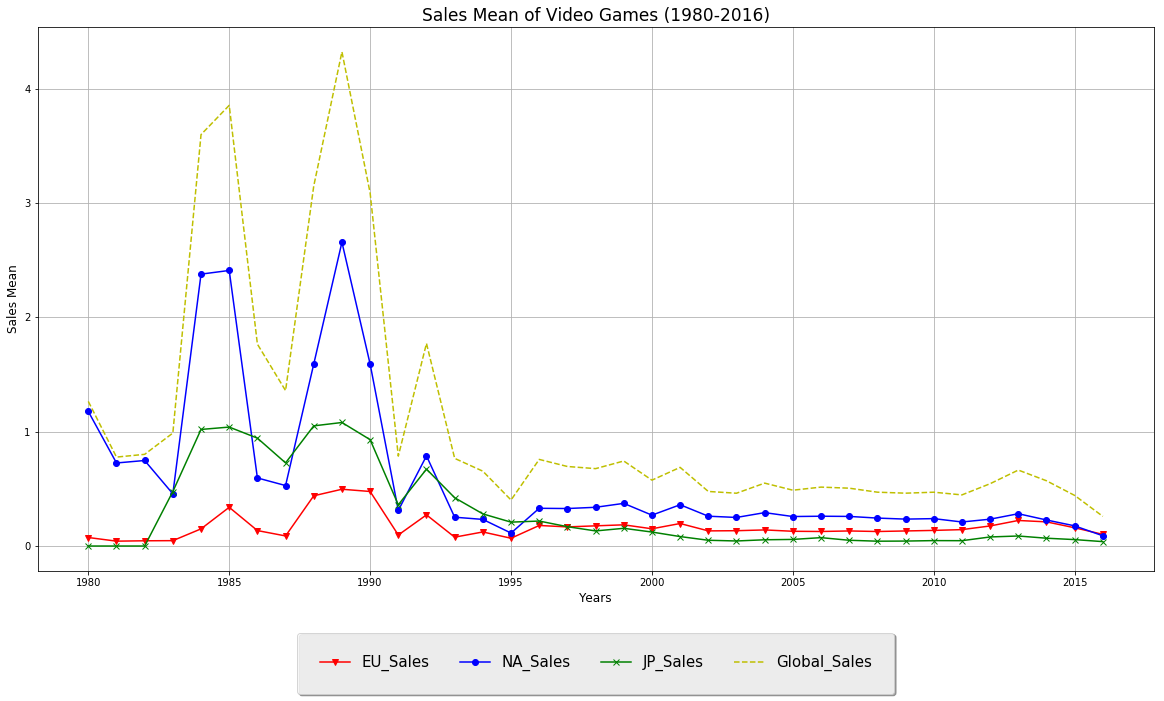

In [9]:
# Create a line graph for mean year over year to see if there are any visual cues of regulatory impact
dfgroup = df.groupby('Year_of_Release').mean()
ax = plt.figure(figsize=(20,10))
plt.grid(True)

# Plot the means year over year for each location and global
plt.plot(dfgroup.index, dfgroup['EU_Sales'],'rv-')
plt.plot(dfgroup.index, dfgroup['NA_Sales'],'bo-')
plt.plot(dfgroup.index, dfgroup['JP_Sales'],'gx-')
plt.plot(dfgroup.index, dfgroup['Global_Sales'],'y--')

plt.xlabel('Years',fontsize=12)
plt.ylabel('Sales Mean',fontsize=12)
plt.title('Sales Mean of Video Games (1980-2016)',fontsize=17)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  shadow=True, ncol=4,borderpad=1.5, labelspacing=1.5,fontsize=15)
plt.show()

Line graph (above) provides a visual representation of means year over year seperated into each location (NA = United States, EU = Europe & JP = Japan). The line graph will provide visual cues of the decrease/increase in mean before and after the regulation. Please note that the first rating agency in the US started in 1994 and there has been a steady decline in the means. Lets take a closer look at games by genre at the peak in 1989 vs the drop in 1995.<br><br>

**Before we do any type of statistics test it would be best to dive into the data deeper and see:**
#### 1. The Distribution of the Samples (to see if we have a normal or non-normal distribution)
#### 2. The Variances of the Samples (to see if we have equal or unequal variances)

<br>
### The Sales Distribution of the Sample (Control vs. Test)

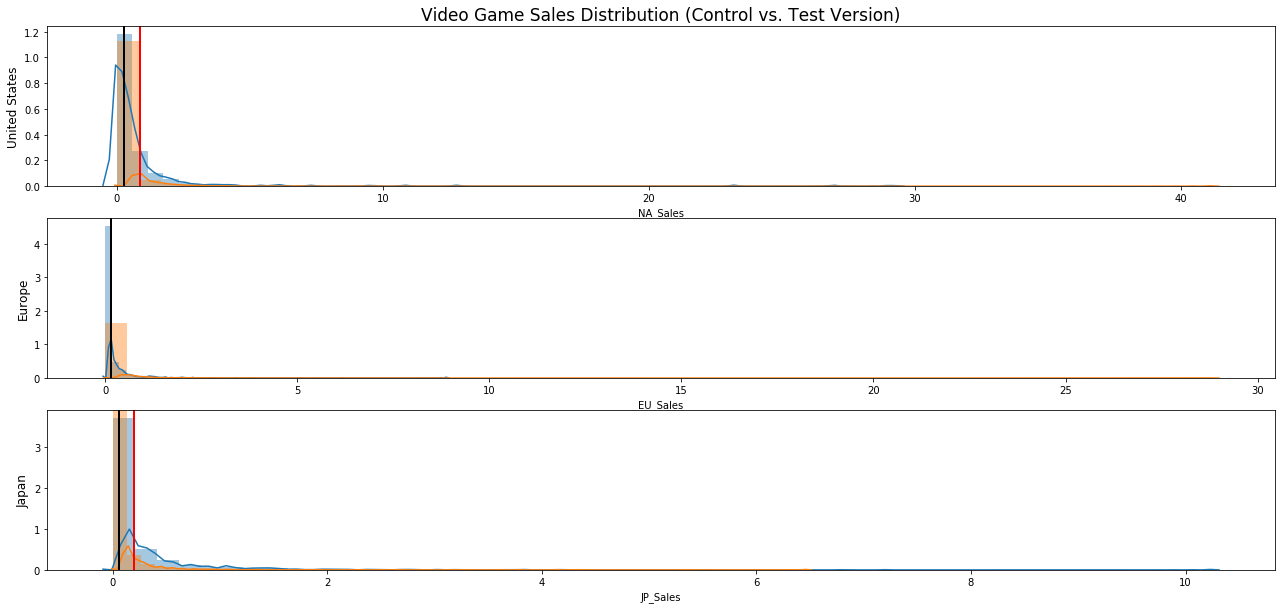

In [10]:
# Create a distribution comparison between control and test version for each location
plt.figure(figsize=(22,10))

#Distribution plot control vs test for US
us=plt.subplot(311)
sns.distplot(df[df.Year_of_Release < 1994].NA_Sales)
sns.distplot(df[df.Year_of_Release >= 1994].NA_Sales)
plt.axvline(df[df.Year_of_Release < 1994].NA_Sales.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(df[df.Year_of_Release >= 1994].NA_Sales.mean(), color='black', linestyle='solid', linewidth=2)
plt.ylabel('United States',fontsize=12)
plt.title('Video Game Sales Distribution (Control vs. Test Version)',fontsize=17)

#Distribution plot control vs test for EU
eu=plt.subplot(312)
sns.distplot(df[df.Year_of_Release < 2003].EU_Sales)
sns.distplot(df[df.Year_of_Release >= 2003].EU_Sales)
plt.axvline(df[df.Year_of_Release < 2003].EU_Sales.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(df[df.Year_of_Release >= 2003].EU_Sales.mean(), color='black', linestyle='solid', linewidth=2)
plt.ylabel('Europe',fontsize=12)

#Distribution plot control vs test for JP
jp=plt.subplot(313)
sns.distplot(df[df.Year_of_Release < 2002].JP_Sales)
sns.distplot(df[df.Year_of_Release >= 2002].JP_Sales)
plt.axvline(df[df.Year_of_Release < 2002].JP_Sales.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(df[df.Year_of_Release >= 2002].JP_Sales.mean(), color='black', linestyle='solid', linewidth=2)
plt.ylabel('Japan',fontsize=12)

plt.show()

"A **right-skewed distribution** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak." ~ Source: (http://www.statisticshowto.com/probability-and-statistics/skewed-distribution/)

The above seems to apply for our sample data, however just to be sure lets take a look at this in a different way.

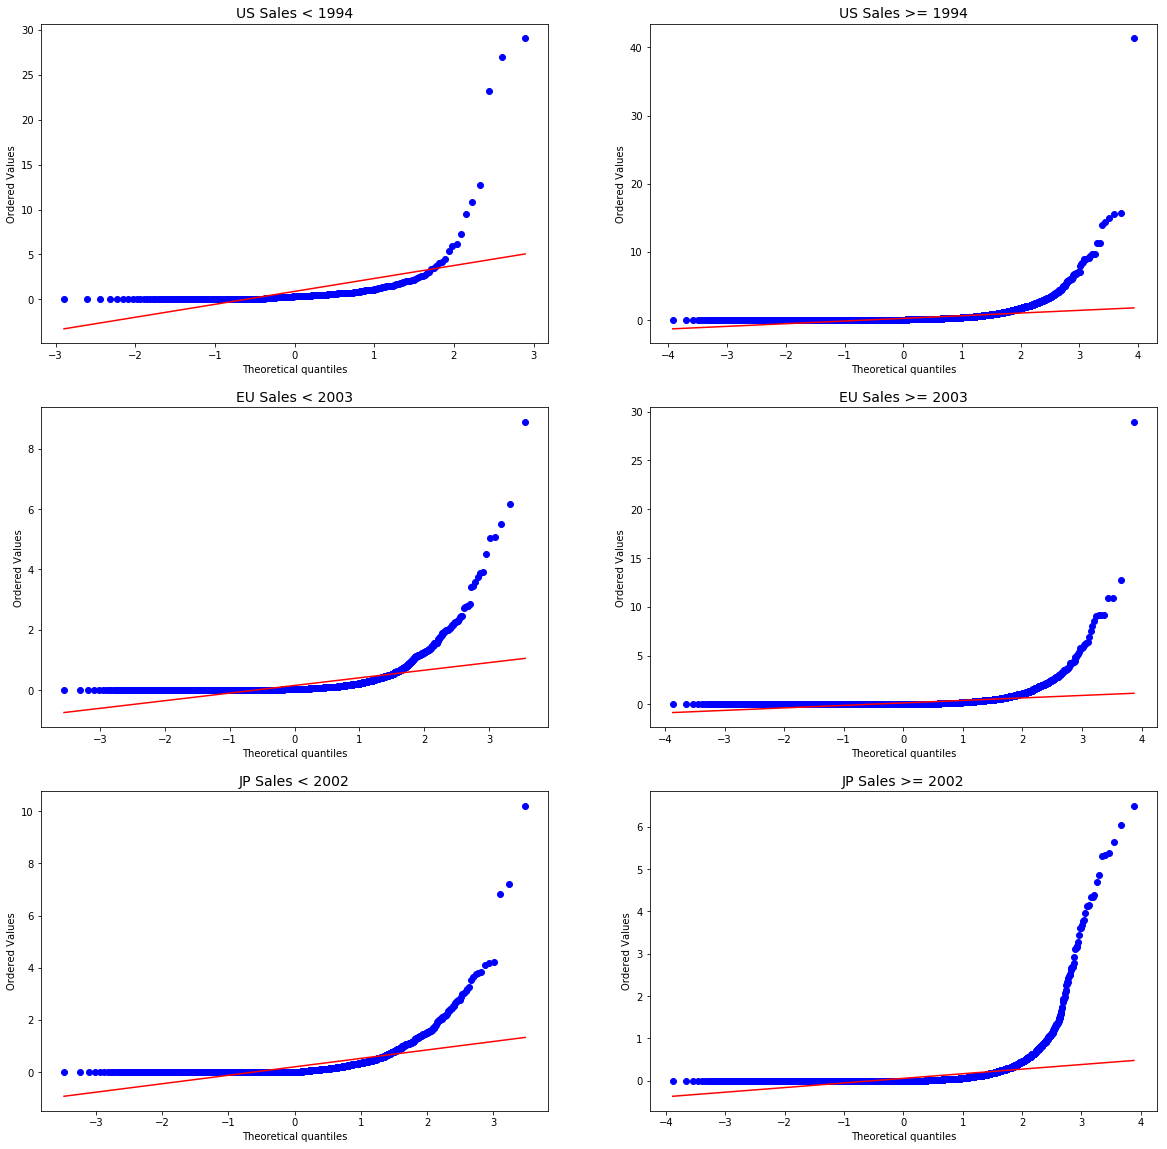

In [11]:
#Create shortcut names for arrays to recall easier
USB1994 = df[df.Year_of_Release < 1994].NA_Sales
USA1994 = df[df.Year_of_Release >= 1994].NA_Sales

EUB2003 = df[df.Year_of_Release < 2003].EU_Sales
EUA2003 = df[df.Year_of_Release >= 2003].EU_Sales

JPB2002 = df[df.Year_of_Release < 2002].JP_Sales
JPA2002 = df[df.Year_of_Release >= 2002].JP_Sales

plt.figure(figsize=(20,20))

#Create QQ plots (probability plots) to see visually if the data is normally distributed

US1=plt.subplot(321)
stats.probplot(USB1994, dist="norm", plot=pylab)
plt.title('US Sales < 1994',fontsize=14)

US2=plt.subplot(322)
stats.probplot(USA1994, dist="norm", plot=pylab)
plt.title('US Sales >= 1994',fontsize=14)

EU1=plt.subplot(323)
stats.probplot(EUB2003, dist="norm", plot=pylab)
plt.title('EU Sales < 2003',fontsize=14)

EU2=plt.subplot(324)
stats.probplot(EUA2003, dist="norm", plot=pylab)
plt.title('EU Sales >= 2003',fontsize=14)

JP1=plt.subplot(325)
stats.probplot(JPB2002, dist="norm", plot=pylab)
plt.title('JP Sales < 2002',fontsize=14)

JP2=plt.subplot(326)
stats.probplot(JPA2002, dist="norm", plot=pylab)
plt.title('JP Sales >= 2002',fontsize=14)

pylab.show()

Using the probablity plots (QQ plots) we can determine that samples that we collected are all right skewed distribution. Next we need to determine if our data has equal or unequal variances.

### Sample Size, Mean, Standard Deviation, Variance, F-Statistic & F-Critical Value

In [12]:
#Compare control vs test version mean
control_test['C_Mean'] = [df[df.Year_of_Release < 1994].NA_Sales.mean(), df[df.Year_of_Release < 2003].EU_Sales.mean(), df[df.Year_of_Release < 2002].JP_Sales.mean()]
control_test['T_Mean'] = [df[df.Year_of_Release >= 1994].NA_Sales.mean(), df[df.Year_of_Release >= 2003].EU_Sales.mean(), df[df.Year_of_Release >= 2002].JP_Sales.mean()]

#Compare control vs test version standard deviation
control_test['C_Std'] = [df[df.Year_of_Release < 1994].NA_Sales.std(), df[df.Year_of_Release < 2003].EU_Sales.std(), df[df.Year_of_Release < 2002].JP_Sales.std()]
control_test['T_Std'] = [df[df.Year_of_Release >= 1994].NA_Sales.std(), df[df.Year_of_Release >= 2003].EU_Sales.std(), df[df.Year_of_Release >= 2002].JP_Sales.std()]

#Compare control vs test version mean variation
control_test['C_Var'] = [np.var(df[df.Year_of_Release < 1994].NA_Sales), np.var(df[df.Year_of_Release < 2003].EU_Sales), np.var(df[df.Year_of_Release < 2002].JP_Sales)]
control_test['T_Var'] = [np.var(df[df.Year_of_Release >= 1994].NA_Sales), np.var(df[df.Year_of_Release >= 2003].EU_Sales), np.var(df[df.Year_of_Release >= 2002].JP_Sales)]

#Check to see if we have unequal variances, if the F_Stat is greater than the F_Crit, we need to compute that in the T Test
control_test['F_Stat'] = [np.var(df[df.Year_of_Release < 1994].NA_Sales) / np.var(df[df.Year_of_Release >= 1994].NA_Sales), np.var(df[df.Year_of_Release < 2003].EU_Sales) / np.var(df[df.Year_of_Release >= 2003].EU_Sales), np.var(df[df.Year_of_Release < 2002].JP_Sales) / np.var(df[df.Year_of_Release >= 2002].JP_Sales)]
control_test['F_Crit'] = [stats.f.ppf(q=1-0.05, dfn=len(df[df.Year_of_Release < 1994])-1, dfd=len(df[df.Year_of_Release >= 1994])-1),stats.f.ppf(q=1-0.05, dfn=len(df[df.Year_of_Release < 2003])-1, dfd=len(df[df.Year_of_Release >= 2003])-1),stats.f.ppf(q=1-0.05, dfn=len(df[df.Year_of_Release < 2002])-1, dfd=len(df[df.Year_of_Release >= 2002])-1)]
control_test.loc[:,'C_Mean':'F_Crit'] = control_test.loc[:,'C_Mean':'F_Crit'].applymap(float)
control_test.drop(['C_Version','Agency_Year_Est' ,'T_Version'], axis=1)


,Location,C_Sample,T_Sample,C_Mean,T_Mean,C_Std,T_Std,C_Var,T_Var,F_Stat,F_Crit
0,United States,365,16079,0.884630,0.249924,2.693639,0.715359,7.235813,0.511706,14.140563,1.126622
1,Europe,3635,12809,0.157216,0.142728,0.415633,0.529690,0.172703,0.280549,0.615590,1.044372
2,Japan,2806,13638,0.198664,0.053761,0.504289,0.246589,0.254216,0.060802,4.181070,1.048950


**Sample Size - ** There's a stark difference in sample size between control and test version across the specified locations. It would be wise to see if the data has equal or unequal variances, to do this we would need to check the F-Statistic and the F-Critical Value.

**Mean - ** It appears that there are large differences (greater than 10%) in means for United States and for Japan. If the data is significant it would prove that our hypothesis is correct. This would mean that sales have decreased after the regulation for all specified locations. In addition, it appears that Europe's control vs test mean appears to be similar.

**Variance - ** Due to the difference in sample size for the specified locations it appears that there are larger variances in the smaller samples (Control Sample) than there are in the Test Samples.

**F-Statistic & F-Critical Value - ** The F-Statistic for US and Japan is larger than the F Critical Value, therefore we can determine that US and Japan has unequal variances. Europe's F-Statistic is lower than the F-Critical Value, this would mean that Europe has equal variances. However, due to the marked difference in sample size between control and test version it would be wise to compare it to equivalent size **(see notes below)**.

### NOTES: 
**ADDITIONAL TESTING FOR EUROPE - ** _Lets randomly take a sample from the test version for Europe of equivalent size to the contol sample size. After doing so we will re-do the F-Test to see if it still has equal variance between the 2 means._

In [13]:
#Isolate the test version of EU to have equivalent sample size as the control version (randomly)
eub = pd.DataFrame(df[df.Year_of_Release >= 2003].EU_Sales.take(np.random.permutation(len(df[df.Year_of_Release >= 2003].EU_Sales))[:3635]))

#Run all of the same test above
my_array2 = np.matrix(['Europe',
            len(df[df.Year_of_Release < 2003]),
            len(eub.EU_Sales),
            df[df.Year_of_Release < 2003].EU_Sales.mean(),
            eub.EU_Sales.mean(),
            df[df.Year_of_Release < 2003].EU_Sales.std(),
            eub.EU_Sales.std(),
            np.var(df[df.Year_of_Release < 2003].EU_Sales),
            np.var(eub.EU_Sales),
            np.var(df[df.Year_of_Release < 2003].EU_Sales)/np.var(eub.EU_Sales),
            stats.f.ppf(q=1-0.05, dfn=len(df[df.Year_of_Release < 2003])-1, dfd=len(eub.EU_Sales)-1)])


eunew = pd.DataFrame(my_array2)
eunew.columns = ['Desc.','C_Sample','T_Sample','C_Mean','T_Mean','C_Std','T_Std','C_Var','T_Var','F_Stat','F_Crit']

eunew.loc[:,'C_Mean':'F_Crit'] = eunew.loc[:,'C_Mean':'F_Crit'].applymap(float)
eunew

,Desc.,C_Sample,T_Sample,C_Mean,T_Mean,C_Std,T_Std,C_Var,T_Var,F_Stat,F_Crit
0,Europe,3635,3635,0.157216,0.155697,0.415633,0.701598,0.172703,0.492105,0.350948,1.0561


The F-test above determine that Europe's test vs. control version of random equal sample size still produced equal variance result.

### Which test for which?

Following the plotting the distribution, and finding out the variances we will define the appropriate test for each data set. A nonparametric two-sample comparison for data that does not follow the normal distribution would be appropriate for the non-normal data sets. Please note once more that US and Japan has unequal variances but similar shape, therefore for US and Japan we will apply the **Mann-Whitney** test, however for Europe we will apply the **Kruskal-Wallis** test due to the samples having similar shape and equal variances.

- Mann-Whitney: US & Japan
- Kruskal-Wallis: Europe

"**The Mann–Whitney U test** (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

Unlike the t-test it does not require the assumption of normal distributions. It is nearly as efficient as the t-test on normal distributions.

This test can be used to determine whether two independent samples were selected from populations having the same distribution; a similar nonparametric test used on dependent samples is the Wilcoxon signed-rank test." ~ Wikipedia (https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

"**The Kruskal–Wallis test** by ranks, Kruskal–Wallis H test[1] (named after William Kruskal and W. Allen Wallis), or One-way ANOVA on ranks is a non-parametric method for testing whether samples originate from the same distribution.[2][3][4] It is used for comparing two or more independent samples of equal or different sample sizes. It extends the Mann–Whitney U test when there are more than two groups. The parametric equivalent of the Kruskal-Wallis test is the one-way analysis of variance (ANOVA). A significant Kruskal-Wallis test indicates that at least one sample stochastically dominates one other sample. The test does not identify where this stochastic dominance occurs or for how many pairs of groups stochastic dominance obtains. Dunn's test,[5] or the more powerful but less well known Conover-Iman test[6] would help analyze the specific sample pairs for stochastic dominance in post hoc tests.

Since it is a non-parametric method, the Kruskal–Wallis test does not assume a normal distribution of the residuals, unlike the analogous one-way analysis of variance. If the researcher can make the less stringent assumptions of an identically shaped and scaled distribution for all groups, except for any difference in medians, then the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group." ~ Wikipedia (https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance)

### Conclusion

In [14]:
print('\033[1m' + 'United States Video Game Sales' + '\033[0m')
print('\n')
print('A Mann-Whitney Test was conducted to compare video game sales before and after enforcement of placing ratings to video games. There was a difference in the scores before the regulation (Mean={}, Std={}) and after the regulation (Mean={}, Std={}) conditions; {}. These results suggest that placing ratings on video games does have a negative impact on video game sales. Specifically, our results suggest that when ratings were applied to video games, video game sales decreased.'.format(df[df.Year_of_Release < 1994].NA_Sales.mean(),df[df.Year_of_Release < 1994].NA_Sales.std(),df[df.Year_of_Release >= 1994].NA_Sales.mean(),df[df.Year_of_Release >= 1994].NA_Sales.std(),stats.mannwhitneyu(df[df.Year_of_Release < 1994].NA_Sales, df[df.Year_of_Release >= 1994].NA_Sales)))
print('\n')
print('Pass - It passes our definition of change of greater than 10% in sales rate difference.')
print('\n'*2)

print('\033[1m' + 'Europe Video Game Sales' + '\033[0m')
print('\n')
print('A Kruskal-Wallis Test was conducted to compare video game sales before and after enforcement of placing ratings to video games. There was a difference in the scores before the regulation (Mean={}, Std={}) and after the regulation (Mean={}, Std={}) conditions; {}. These results suggest that placing ratings on video games does have a negative impact on video game sales. Specifically, our results suggest that when ratings were applied to video games, video game sales decreased.'.format(df[df.Year_of_Release < 2003].EU_Sales.mean(),df[df.Year_of_Release < 2003].EU_Sales.std(),df[df.Year_of_Release >= 2003].EU_Sales.mean(),df[df.Year_of_Release >= 2003].EU_Sales.std(),stats.kruskal(df[df.Year_of_Release < 2003].EU_Sales, df[df.Year_of_Release >= 2003].EU_Sales)))
print('\n')
print('Fail - Although there is a difference in means, it fails our definition of change of greater than 10% in sales rate difference.')
print('\n'*2)

print('\033[1m' + 'Japan Video Game Sales' + '\033[0m')
print('\n')
print('A Mann-Whitney Test was conducted to compare video game sales before and after enforcement of placing ratings to video games. There was a difference in the scores before the regulation (Mean={}, Std={}) and after the regulation (Mean={}, Std={}) conditions; {}. These results suggest that placing ratings on video games does have a negative impact on video game sales. Specifically, our results suggest that when ratings were applied to video games, video game sales decreased.'.format(df[df.Year_of_Release < 2002].JP_Sales.mean(),df[df.Year_of_Release < 2002].JP_Sales.std(),df[df.Year_of_Release >= 2002].JP_Sales.mean(),df[df.Year_of_Release >= 2002].JP_Sales.std(),stats.mannwhitneyu(df[df.Year_of_Release < 2002].JP_Sales, df[df.Year_of_Release >= 2002].JP_Sales)))
print('\n')
print('Pass - It passes our definition of change of greater than 10% in sales rate difference.')

United States Video Game Sales


A Mann-Whitney Test was conducted to compare video game sales before and after enforcement of placing ratings to video games. There was a difference in the scores before the regulation (Mean=0.8846301369863017, Std=2.6936391674598688) and after the regulation (Mean=0.24992412463463556, Std=0.7153586575425221) conditions; MannwhitneyuResult(statistic=2214262.0, pvalue=2.4847609669845358e-16). These results suggest that placing ratings on video games does have a negative impact on video game sales. Specifically, our results suggest that when ratings were applied to video games, video game sales decreased.


Pass - It passes our definition of change of greater than 10% in sales rate difference.



Europe Video Game Sales


A Kruskal-Wallis Test was conducted to compare video game sales before and after enforcement of placing ratings to video games. There was a difference in the scores before the regulation (Mean=0.15721595598348762, Std=0.4156331496648188)

***
### Other Measured Variables - Video Game Sales by Genre in each location:


In [58]:
dfusbp = pd.DataFrame(df[df.Year_of_Release < 1994].groupby('Genre').NA_Sales.sum())
dfusbp.columns = ['US_Before_Agency']
dfusap = pd.DataFrame(df[df.Year_of_Release >= 1994].groupby('Genre').NA_Sales.sum())
dfusap.columns = ['US_After_Agency']
dfcomb = pd.concat([dfusbp,dfusap], axis=1)
dfcomb['US_+/-'] = dfcomb['US_After_Agency'] - dfcomb['US_Before_Agency']


dfeubp = pd.DataFrame(df[df.Year_of_Release < 2003].groupby('Genre').EU_Sales.sum())
dfeubp.columns = ['EU_Before_Agency']
dfeuap = pd.DataFrame(df[df.Year_of_Release >= 2003].groupby('Genre').EU_Sales.sum())
dfeuap.columns = ['EU_After_Agency']
dfcomb = pd.concat([dfcomb,dfeubp,dfeuap], axis=1)
dfcomb['EU_+/-'] = dfcomb['EU_After_Agency'] - dfcomb['EU_Before_Agency']


dfjpbp = pd.DataFrame(df[df.Year_of_Release < 2002].groupby('Genre').JP_Sales.sum())
dfjpbp.columns = ['JP_Before_Agency']
dfjpap = pd.DataFrame(df[df.Year_of_Release >= 2002].groupby('Genre').JP_Sales.sum())
dfjpap.columns = ['JP_After_Agency']
dfcomb = pd.concat([dfcomb,dfjpbp,dfjpap], axis=1)
dfcomb['JP_+/-'] = dfcomb['JP_After_Agency'] - dfcomb['JP_Before_Agency']

dfcomb

,US_Before_Agency,US_After_Agency,US_+/-,EU_Before_Agency,EU_After_Agency,EU_+/-,JP_Before_Agency,JP_After_Agency,JP_+/-
Genre,,,,,,,,,
Action,48.49,814.68,766.19,101.51,409.48,307.97,37.64,122.50,84.86
Adventure,9.60,91.92,82.32,20.57,42.63,22.06,17.08,35.16,18.08
Fighting,12.40,208.11,195.71,42.01,56.99,14.98,48.17,39.11,-9.06
Misc,5.65,393.92,388.27,26.61,183.99,157.38,25.62,81.40,55.78
Platform,110.73,333.71,222.98,87.95,111.44,23.49,81.54,49.17,-32.37
Puzzle,49.86,71.27,21.41,14.21,35.57,21.36,34.18,22.50,-11.68
Racing,14.04,342.82,328.78,75.75,158.74,82.99,34.04,22.59,-11.45
Role-Playing,1.63,328.41,326.78,50.29,137.95,87.66,137.03,216.36,79.33
Shooter,53.53,531.30,477.77,45.15,269.37,224.22,16.13,22.55,6.42


For other measured variables we will take a look at the genres of the video game before and after the establishment of the rating agencies. (We will also use the factorial design for this test)

In addition we will define the following genres as the following:

- Action
- Adventure
- Fighting
- Platform
- Role Playing
- Shooter

In [60]:
print ('''How much has the gaming industry increased after the establishment of the Rating Agencies?

The overall US Gaming Industry has increased by {:,.2f} or {:,.2f}%.
The overall EU Gaming Industry has increased by {:,.2f} or {:,.2f}%.
The overall JP Gaming Industry has increased by {:,.2f} or {:,.2f}%.'''.format(dfcomb['US_+/-'].sum(), 
    dfcomb['US_+/-'].sum()/dfcomb['US_Before_Agency'].sum()*100,
    dfcomb['EU_+/-'].sum(), 
    dfcomb['EU_+/-'].sum()/dfcomb['EU_Before_Agency'].sum()*100,
    dfcomb['JP_+/-'].sum(), 
    dfcomb['JP_+/-'].sum()/dfcomb['JP_Before_Agency'].sum()*100))

How much has the gaming industry increased after the establishment of the Rating Agencies?

The overall US Gaming Industry has increased by 3,695.64 or 1,144.55%.
The overall EU Gaming Industry has increased by 1,256.72 or 219.91%.
The overall JP Gaming Industry has increased by 175.74 or 31.53%.


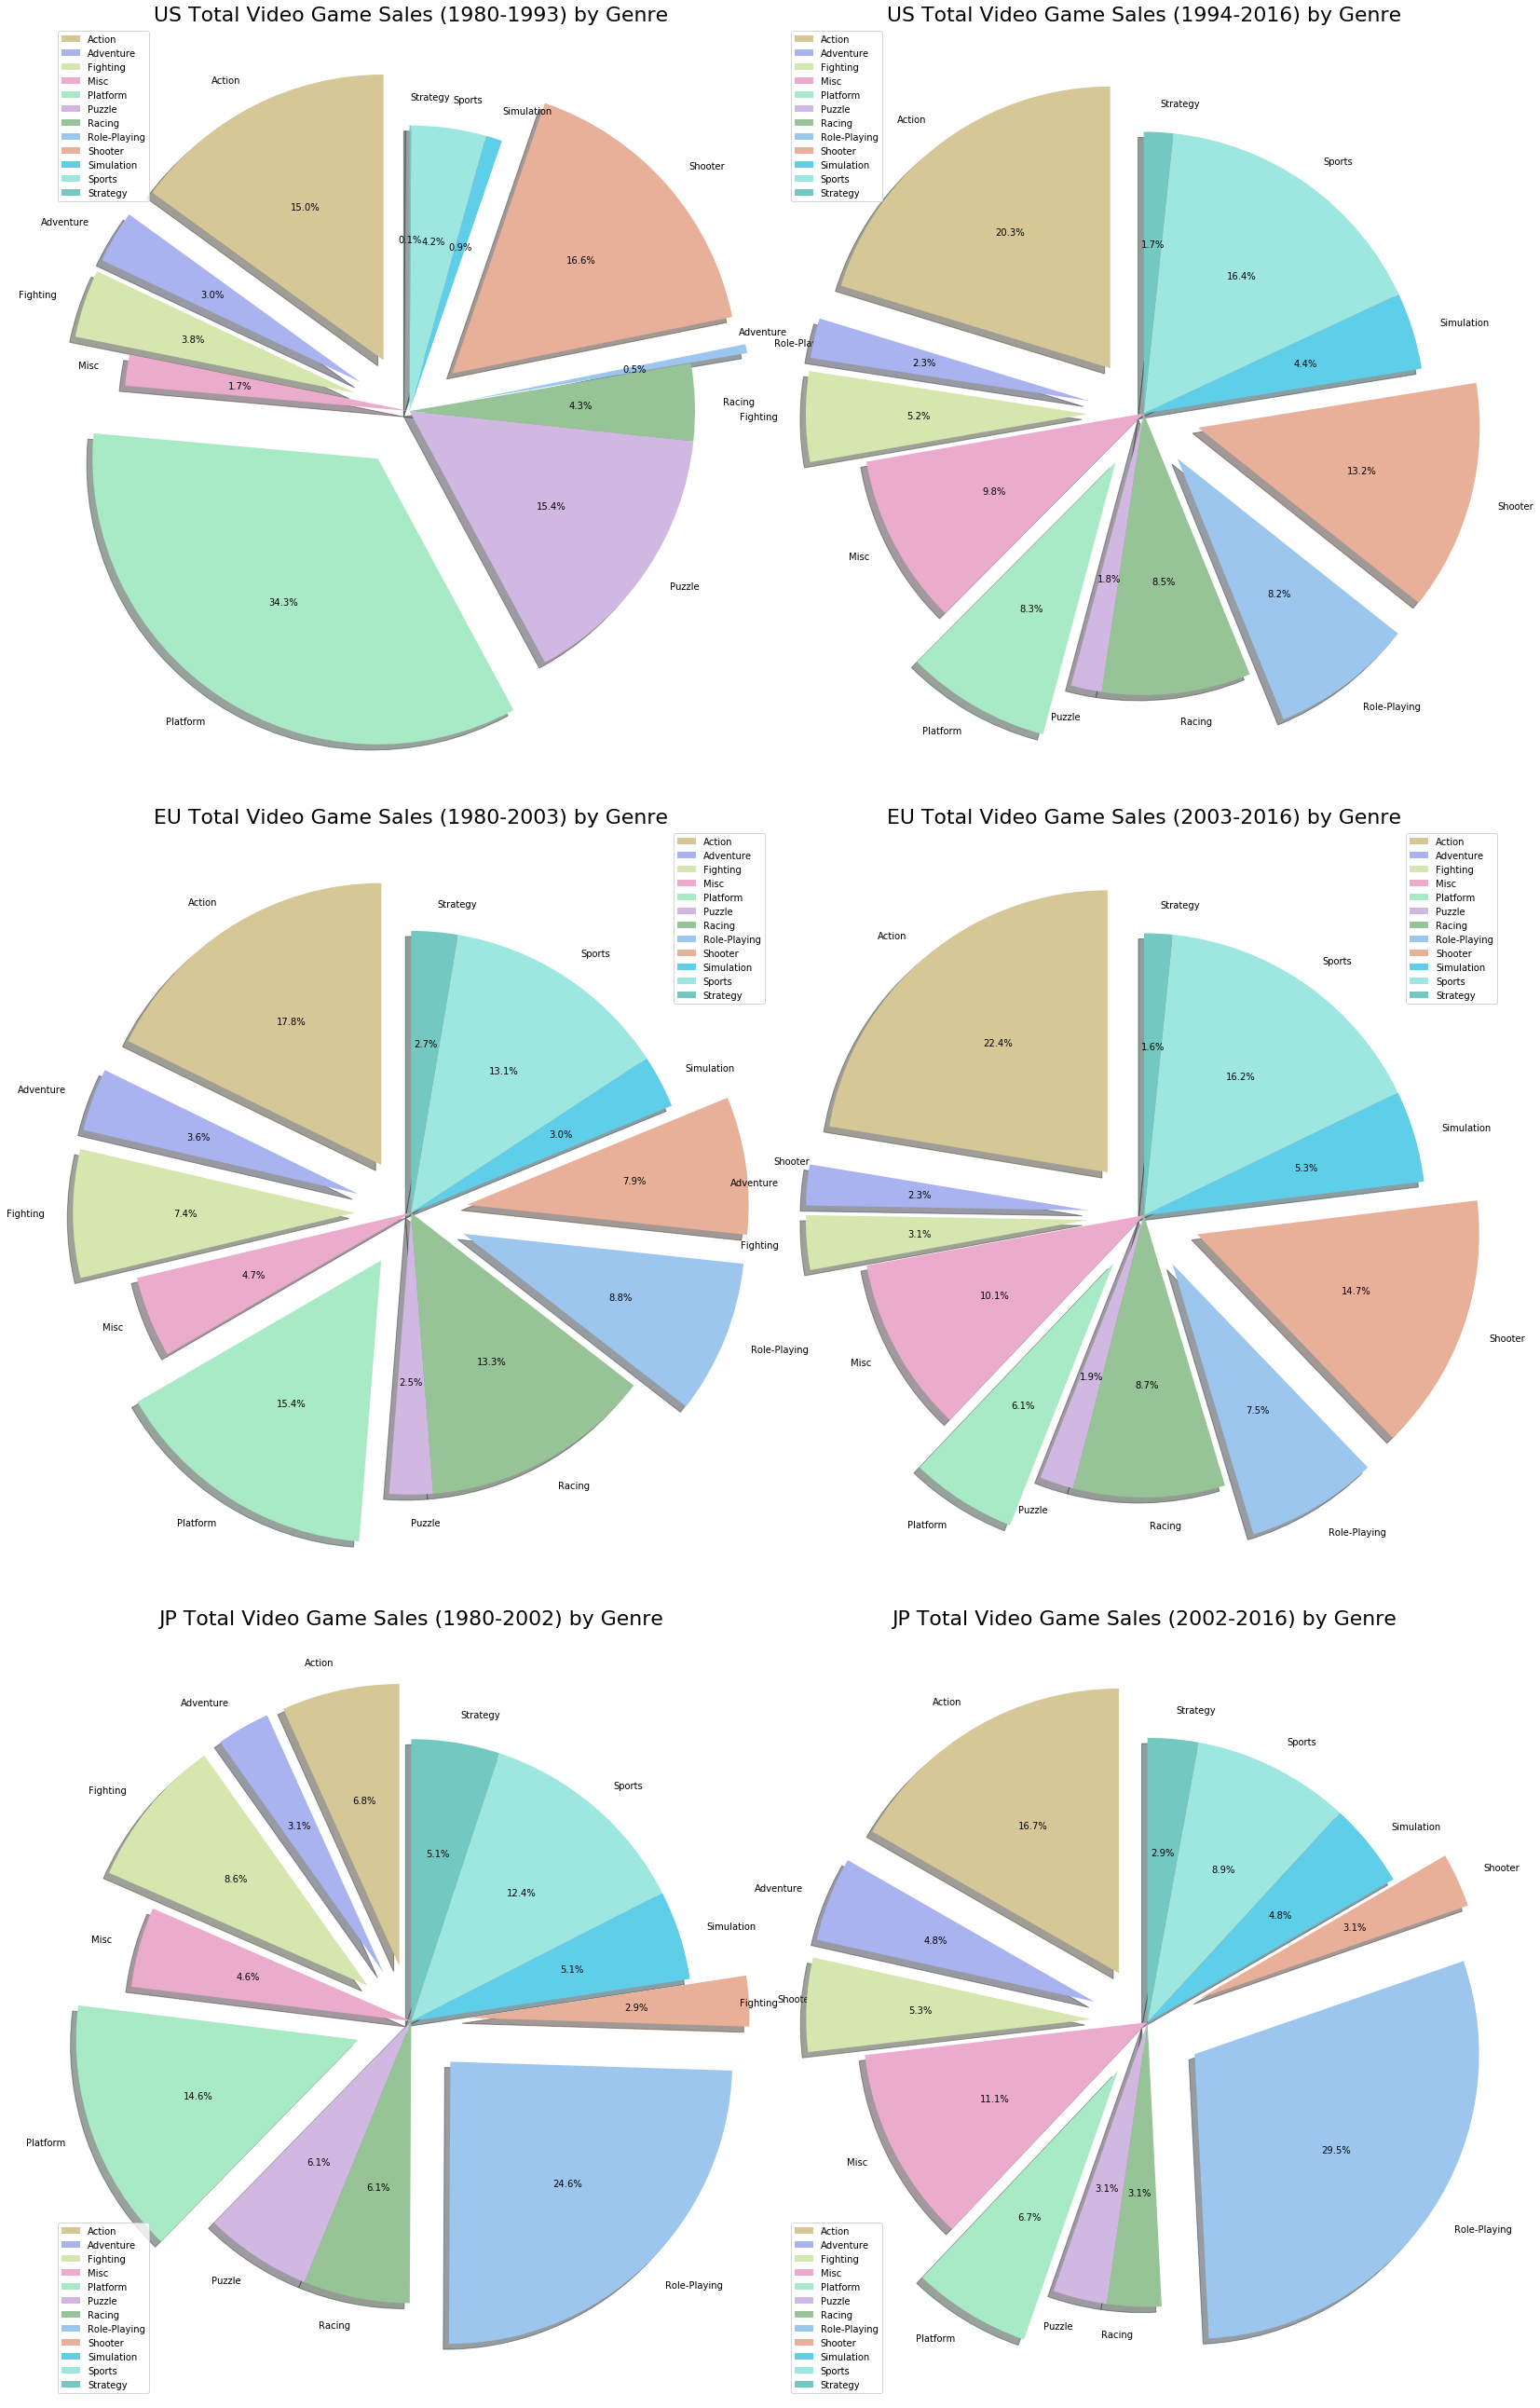

In [62]:
plt.figure(figsize=(22,36))
#colors generated from IwantHue
colors1 = ["#d6c796","#ebabcd","#a9eac6","#d1b8e2","#9cc6ed","#e8af99","#9ee7e1"]
colors2 = ["#d6c796","#a9b3f0","#d5e7af","#ebabcd","#a9eac6","#d1b8e2","#97c496","#9cc6ed","#e8af99","#5ecee9","#9ee7e1","#73c9c1"]

#Plot US Total Video Game Sales (1980-1993) by Genre
plt.subplot(321)
plt.pie(df[df.Year_of_Release < 1994].groupby('Genre').NA_Sales.sum(),
    labels=df[df.Year_of_Release < 1994].groupby('Genre').NA_Sales.sum().index,
    shadow=True,
    colors=colors2,
    explode=(.2, .2, .2, 0, .2, 0, 0, .2, .2, 0, 0, 0), #This will explode the genre that are considered violent
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="upper left")
plt.title('US Total Video Game Sales (1980-1993) by Genre',fontsize=22)

#Plot US Total Video Game Sales (1994-2016) by Genre
plt.subplot(322)
plt.pie(df[df.Year_of_Release >= 1994].groupby('Genre').NA_Sales.sum(),
    labels=df[df.Year_of_Release >= 1994].groupby('Genre').NA_Sales.sum().index,
    shadow=True,
    colors=colors2,
    explode=(.2, .2, .2, 0, .2, 0, 0, .2, .2, 0, 0, 0), #This will explode the genre that are considered violent
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="upper left")
plt.title('US Total Video Game Sales (1994-2016) by Genre',fontsize=22)

#Plot EU Total Video Game Sales (1980-2003) by Genre
plt.subplot(323)
plt.pie(df[df.Year_of_Release < 2003].groupby('Genre').EU_Sales.sum(),
    labels=df[df.Year_of_Release < 2003].groupby('Genre').EU_Sales.sum().index,
    shadow=True,
    colors=colors2,
    explode=(.2, .2, .2, 0, .2, 0, 0, .2, .2, 0, 0, 0), #This will explode the genre that are considered violent
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="upper right")
plt.title('EU Total Video Game Sales (1980-2003) by Genre',fontsize=22)

#Plot EU Total Video Game Sales (2003-2016) by Genre
plt.subplot(324)
plt.pie(df[df.Year_of_Release >= 2003].groupby('Genre').EU_Sales.sum(),
    labels=df[df.Year_of_Release >= 2003].groupby('Genre').EU_Sales.sum().index,
    shadow=True,
    colors=colors2,
    explode=(.2, .2, .2, 0, .2, 0, 0, .2, .2, 0, 0, 0), #This will explode the genre that are considered violent
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="upper right")
plt.title('EU Total Video Game Sales (2003-2016) by Genre',fontsize=22)

#Plot JP Total Video Game Sales (1980-2002) by Genre
plt.subplot(325)
plt.pie(df[df.Year_of_Release < 2002].groupby('Genre').JP_Sales.sum(),
    labels=df[df.Year_of_Release < 2002].groupby('Genre').JP_Sales.sum().index,
    shadow=True,
    colors=colors2,
    explode=(.2, .2, .2, 0, .2, 0, 0, .2, .2, 0, 0, 0), #This will explode the genre that are considered violent
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower left")
plt.title('JP Total Video Game Sales (1980-2002) by Genre',fontsize=22)

#Plot JP Total Video Game Sales (2002-2016) by Genre
plt.subplot(326)
plt.pie(df[df.Year_of_Release >= 2002].groupby('Genre').JP_Sales.sum(),
    labels=df[df.Year_of_Release >= 2002].groupby('Genre').JP_Sales.sum().index,
    shadow=True,
    colors=colors2,
    explode=(.2, .2, .2, 0, .2, 0, 0, .2, .2, 0, 0, 0), #This will explode the genre that are considered violent
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower left")
plt.title('JP Total Video Game Sales (2002-2016) by Genre',fontsize=22)

plt.tight_layout()
plt.show()

In [63]:
dfusbp1 = pd.DataFrame(df[df.Year_of_Release < 1994].groupby('Genre').NA_Sales.sum())
dfusbp1.columns = ['US_Before_Agency']
dfusap1 = pd.DataFrame(df[df.Year_of_Release >= 1994].groupby('Genre').NA_Sales.sum())
dfusap1.columns = ['US_After_Agency']
dfcomb1 = pd.concat([dfusbp1,dfusap1], axis=1)

dfcomb1['US_Before_Agency'] = dfcomb1['US_Before_Agency'] / dfcomb1['US_Before_Agency'].sum()
dfcomb1['US_After_Agency'] = dfcomb1['US_After_Agency'] / dfcomb1['US_After_Agency'].sum()
dfcomb1['US_+/-'] = dfcomb1['US_After_Agency'] - dfcomb1['US_Before_Agency']


dfeubp1 = pd.DataFrame(df[df.Year_of_Release < 2003].groupby('Genre').EU_Sales.sum())
dfeubp1.columns = ['EU_Before_Agency']
dfeuap1 = pd.DataFrame(df[df.Year_of_Release >= 2003].groupby('Genre').EU_Sales.sum())
dfeuap1.columns = ['EU_After_Agency']
dfcomb1 = pd.concat([dfcomb1,dfeubp1,dfeuap1], axis=1)
dfcomb1['EU_Before_Agency'] = dfcomb1['EU_Before_Agency'] / dfcomb1['EU_Before_Agency'].sum()
dfcomb1['EU_After_Agency'] = dfcomb1['EU_After_Agency'] / dfcomb1['EU_After_Agency'].sum()
dfcomb1['EU_+/-'] = dfcomb1['EU_After_Agency'] - dfcomb1['EU_Before_Agency']


dfjpbp1 = pd.DataFrame(df[df.Year_of_Release < 2002].groupby('Genre').JP_Sales.sum())
dfjpbp1.columns = ['JP_Before_Agency']
dfjpap1 = pd.DataFrame(df[df.Year_of_Release >= 2002].groupby('Genre').JP_Sales.sum())
dfjpap1.columns = ['JP_After_Agency']
dfcomb1 = pd.concat([dfcomb1,dfjpbp1,dfjpap1], axis=1)
dfcomb1['JP_Before_Agency'] = dfcomb1['JP_Before_Agency'] / dfcomb1['JP_Before_Agency'].sum()
dfcomb1['JP_After_Agency'] = dfcomb1['JP_After_Agency'] / dfcomb1['JP_After_Agency'].sum()
dfcomb1['JP_+/-'] = dfcomb1['JP_After_Agency'] - dfcomb1['JP_Before_Agency']

dfcomb1

,US_Before_Agency,US_After_Agency,US_+/-,EU_Before_Agency,EU_After_Agency,EU_+/-,JP_Before_Agency,JP_After_Agency,JP_+/-
Genre,,,,,,,,,
Action,0.150175,0.202731,0.052556,0.177627,0.223980,0.046353,0.067522,0.167078,0.099556
Adventure,0.029731,0.022874,-0.006857,0.035994,0.023318,-0.012676,0.030640,0.047955,0.017315
Fighting,0.038403,0.051788,0.013384,0.073511,0.031173,-0.042338,0.086411,0.053342,-0.033069
Misc,0.017498,0.098026,0.080528,0.046563,0.100640,0.054077,0.045959,0.111022,0.065062
Platform,0.342934,0.083043,-0.259891,0.153899,0.060956,-0.092943,0.146273,0.067063,-0.079210
Puzzle,0.154418,0.017735,-0.136683,0.024865,0.019456,-0.005409,0.061315,0.030688,-0.030627
Racing,0.043482,0.085310,0.041828,0.132551,0.086829,-0.045722,0.061064,0.030811,-0.030253
Role-Playing,0.005048,0.081724,0.076676,0.088000,0.075457,-0.012543,0.245816,0.295094,0.049278
Shooter,0.165784,0.132213,-0.033571,0.079005,0.147342,0.068336,0.028935,0.030756,0.001821


Games by genre in the us before and after the establishment of the rating agency depicted a picture contrary to the goals that regulation was supposed to achieve. Genres that may fall into the category of violent video games are Action, Adventure, Fighting, Platform, Role-Playing & Shooter. 

Just comparing the number of violent categories, it has doubled increasing from 3 violent categories to 6 by 2016. Almost all of the genre that would be categorized as violent games increased as a percentage of sales when isolating the two years with the exception of shooter.

**Please note: **_Shooter (Violent Category) had the biggest drop, decreasing from 62.1% in 1980 to 29.2% in 2016. Although this category has dropped, lets take a closer look at sales numbers to really determine if it has increased or decreased._

In [17]:
print('It appears that the overall market has grown, however')

It appears that the overall market has grown, however


Although it is important to see the allocation comparison, it would be better to compare the data as a numerical value. Shown above from the violent categories we defined above, there were increases almost all across the board; Action by 29.89 or 879%, Adventure increased by 3.83, Fighting increased by 3.67 or 477%, Role Playing increased by 18.12, and Shooter by 31.16 or 441%. Although the "shooter" category has decreased as an overall percentage of the market, the number of sales has increased therefore reaching more audience overall. There was only one category that decreased was Misc by 0.08 or 3%. The largest genre that increased as a number was Shooter, which falls under the violent category. While the largest decrease is the same as the pie chart it would be the Misc genre, which does not fall under the violent category. Counter to the creation purpose of the rating agencies it appears that game developers produced and sold more "violent" games after the initial establishment of the rating agency.

_Lets take a look at a comparison on the peak vs the trough of the data 1989 vs 1995 and look at the genre comparisons._

_Lets take a look at a comparison on the peak vs the trough of the data 1989 vs 1995 and look at the genre comparisons._

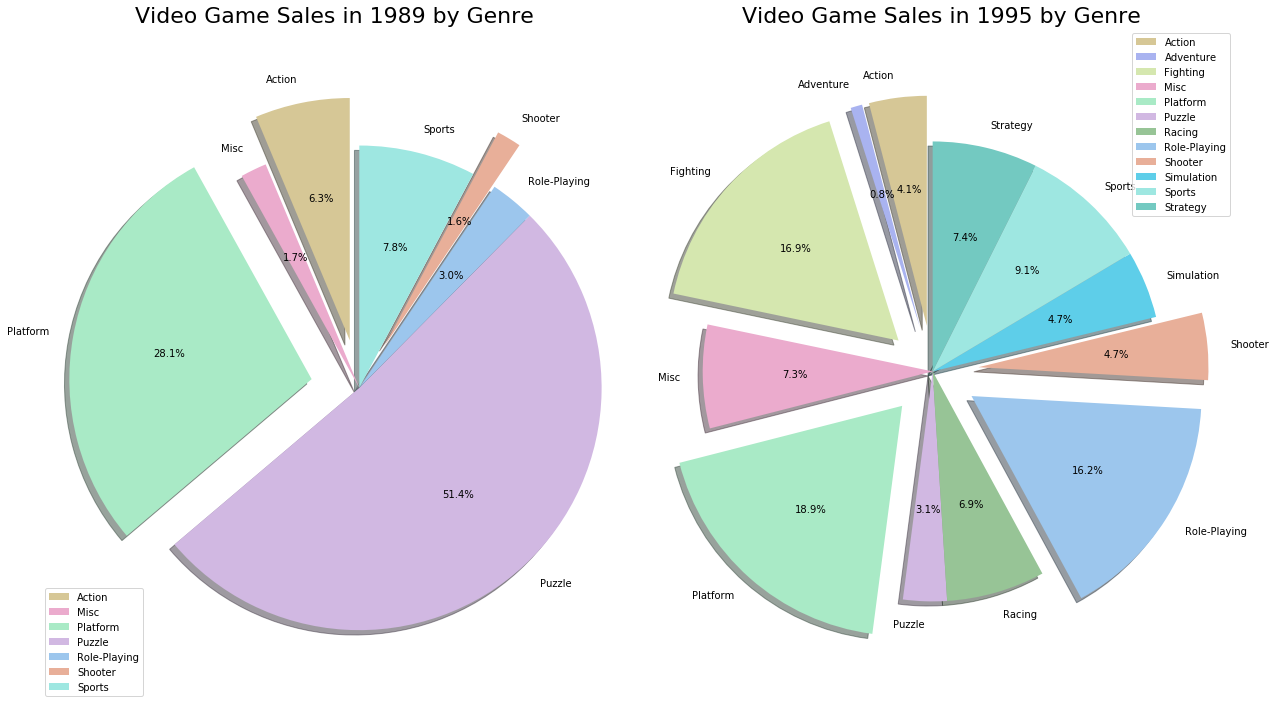

In [19]:
plt.figure(figsize=(17,10))
#Plot Video Game Sales in 1989 by Genre
plt.subplot(121)
plt.pie(df[df.Year_of_Release == 1989].groupby('Genre').Global_Sales.sum(),
    labels=df[df.Year_of_Release == 1989].groupby('Genre').Global_Sales.sum().index,
    shadow=True,
    colors=colors1,
    explode=(.2, 0, .2, 0, 0, .2, 0),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower left")
plt.title('Video Game Sales in 1989 by Genre',fontsize=22)

#Plot Video Game Sales in 1995 by Genre
plt.subplot(122)
plt.pie(df[df.Year_of_Release == 1995].groupby('Genre').Global_Sales.sum(),
    labels=df[df.Year_of_Release == 1995].groupby('Genre').Global_Sales.sum().index,
    shadow=True,
    colors=colors2,
    explode=(.2, .2, .2, 0, .2, 0, 0, .2, .2, 0, 0, 0),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="upper right")
plt.title('Video Game Sales in 1995 by Genre',fontsize=22)
plt.tight_layout()
plt.show()

Games by genre in 1989 vs 1995 depicted a picture contrary to the goals that regulation was supposed to achieve. Genres that may fall into the category of violent video games are Action, Adventure, Fighting, Platform, Role-Playing & Shooter. Almost all of the genre that would be categorized as violent games increased as a percentage of sales when isolating the different years, while the only category that decreased as a percentage is Action when isolating the different years.

**Please note: **Puzzle games (Non-Violent Category) had the biggest drop, decreasing from 51.4% in 1989 to 3.1% in 1995.

In [20]:
df1989 = pd.DataFrame(df[df.Year_of_Release == 1989].groupby('Genre').Global_Sales.sum())
df1989.columns = ['1989_Global_Sales']
df1995 = pd.DataFrame(df[df.Year_of_Release == 1995].groupby('Genre').Global_Sales.sum())
df1995.columns = ['1995_Global_Sales']
dfcomb2 = pd.concat([df1989, df1995], axis=1)
dfcomb2['1989_Global_Sales'] = dfcomb2['1989_Global_Sales'].fillna(0)
dfcomb2['Num_Inc_Dec'] = dfcomb2['1995_Global_Sales'] - dfcomb2['1989_Global_Sales']
dfcomb2['%_Inc_Dec'] = dfcomb2['Num_Inc_Dec'] / dfcomb2['1989_Global_Sales']
dfcomb2

,1989_Global_Sales,1995_Global_Sales,Num_Inc_Dec,%_Inc_Dec
Action,4.64,3.57,-1.07,-0.230603
Adventure,0.00,0.72,0.72,inf
Fighting,0.00,14.85,14.85,inf
Misc,1.28,6.40,5.12,4.000000
Platform,20.66,16.69,-3.97,-0.192159
Puzzle,37.75,2.71,-35.04,-0.928212
Racing,0.00,6.09,6.09,inf
Role-Playing,2.20,14.26,12.06,5.481818
Shooter,1.20,4.15,2.95,2.458333
Simulation,0.00,4.18,4.18,inf


Once more lets compare the data as a numerical value. From the violent categories there were increases almost all across the board; Adventure increased by 0.72, Fighting increased by 14.85, Role Playing increased by 12.06 or 548%, and Shooter by 2.95 or 246%.

The categories that decreased were Action by 1.07 or 23% and Platform by 3.97 or 19%.

The largest genre that increased was "Fighting", which falls under the violent category. While the largest decrease is the same as the pie chart it would be the "Puzzle" genre, which does not fall under the violent category.

Counter to the creation purpose of the rating agencies it appears that game developers produced and sold more "violent" games after the initial establishment of the rating agency.

***
# CREDITS

**Title:** Video Game Sales with Ratings<br>
**User:** Rush Kirubi<br>
**Data Version:** Version 2 (10 months ago - Jan, 2017)<br>
**Version Desc:** Better web scrape that includes records left out due to unicode string errors and server interruptions

### Context

Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

### Content

Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, we have:

- Critic_score - Aggregate score compiled by Metacritic staff
- Critic_count - The number of critics used in coming up with the Critic_score
- User_score - Score by Metacritic's subscribers
- User_count - Number of users who gave the user_score
- Developer - Party responsible for creating the game
- Rating - The ESRB ratings


### Acknowledgements

This repository, https://github.com/wtamu-cisresearch/scraper, after a few adjustments worked extremely well!